In [2]:
from pathlib import Path

def process(input_path):
    with open(input_path, "r") as input_file:
        lines = [line.strip() for line in input_file.readlines() if line.strip()]
    out = lines[:2]
    inverse_folded_lines = lines[2:]
    scores = []
    for line_it, line in enumerate(inverse_folded_lines):
        if (line_it%2)==1:
            continue
        score = float(line.split("seq_recovery=")[1])
        scores.append(score)
    return scores

parent_path = Path("/data/jgut/msa-tests/aaa_porter_all_models/porter_all_models/")
scores = []
for duo_path in parent_path.glob("*"):
    duo_name = str(duo_path.name) 
    if not (duo_name[0].isnumeric()):
        continue
    first_id = duo_name[:5]
    second_id = duo_name[5:]
    scores = scores + [process(parent_path/duo_name/f"{first_id}_conf.a3m")]
    scores = scores + [process(parent_path/duo_name/f"{second_id}_conf.a3m")]
scores
#/data/jgut/msa-tests/aaa_porter_all_models/porter_all_models/1ceeB2k42A/1ceeB_prot/1ceeB_conf.a3m
#/data/jgut/msa-tests/aaa_porter_all_models/porter_all_models/1ceeB2k42A/2k42A_conf.a3m

[[0.2935,
  0.273,
  0.314,
  0.2935,
  0.2799,
  0.2969,
  0.2935,
  0.2867,
  0.2628,
  0.2765,
  0.2799,
  0.273,
  0.2833,
  0.2833,
  0.2935,
  0.2901,
  0.2628,
  0.3038,
  0.2935,
  0.2969,
  0.3003,
  0.2867,
  0.2765,
  0.273,
  0.2765,
  0.2765,
  0.2253,
  0.2765,
  0.3003,
  0.3311,
  0.2696,
  0.2867,
  0.3038,
  0.2969,
  0.3106,
  0.3072,
  0.2969,
  0.273,
  0.2901,
  0.2799,
  0.2935,
  0.3106,
  0.2935,
  0.314,
  0.2491,
  0.2594,
  0.3038,
  0.2765,
  0.2765,
  0.2969,
  0.3208,
  0.3174,
  0.3003,
  0.256,
  0.2696,
  0.2628,
  0.3038,
  0.2628,
  0.3174,
  0.2491,
  0.3106,
  0.2833,
  0.3072,
  0.2901,
  0.2526,
  0.3003,
  0.2901,
  0.2662,
  0.2833,
  0.2833,
  0.2799,
  0.3106,
  0.2833,
  0.2594,
  0.273,
  0.2628,
  0.2628,
  0.3038,
  0.3003,
  0.2867,
  0.2628,
  0.3038,
  0.2491,
  0.2594,
  0.2901,
  0.2833,
  0.2969,
  0.2799,
  0.2321,
  0.273,
  0.2696,
  0.3413,
  0.2799,
  0.3072,
  0.2901,
  0.2799,
  0.2833,
  0.273,
  0.2594,
  0.3276,
  0.2799,


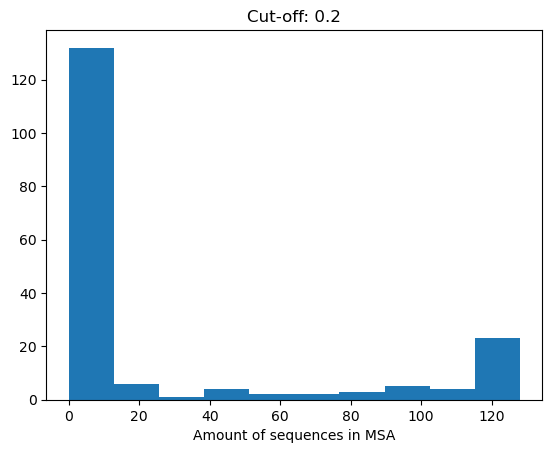

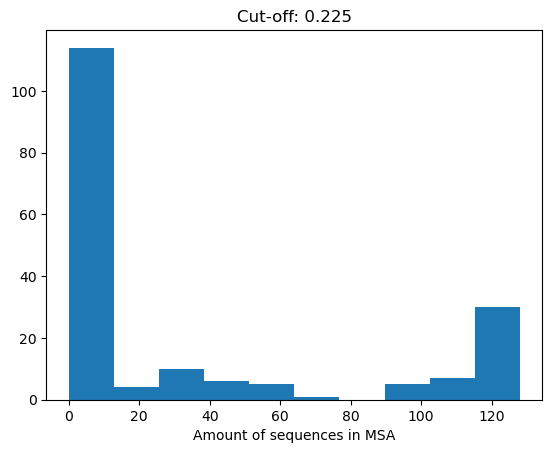

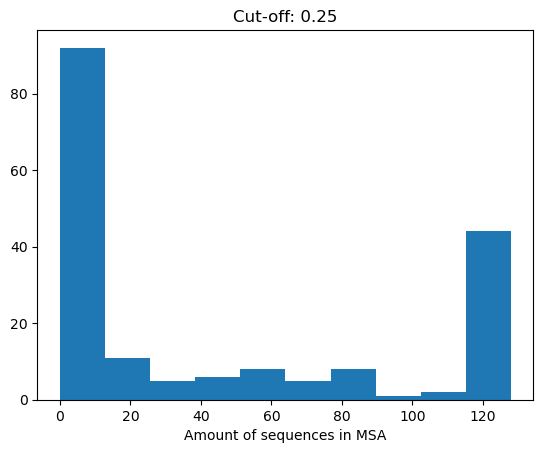

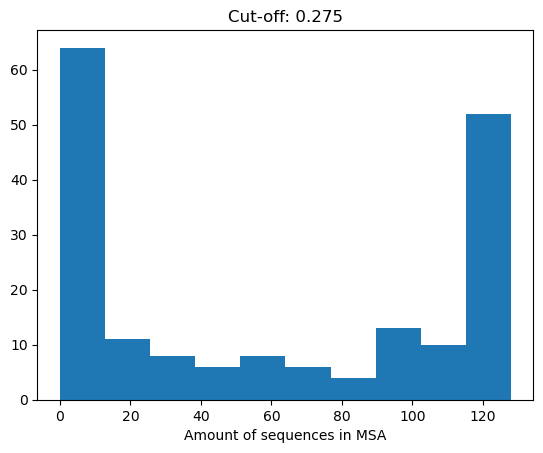

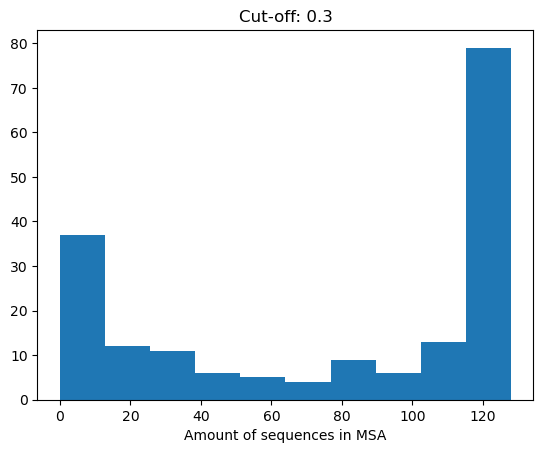

In [10]:
import numpy as np
import matplotlib.pyplot as plt

for cut in [0.2, 0.225, 0.25, 0.275, 0.3]:
    amounts = [sum([score<cut for score in curr_scores]) for curr_scores in scores]
    plt.hist(amounts)
    plt.xlabel("Amount of sequences in MSA")
    plt.title(f"Cut-off: {cut}")
    plt.savefig(f"Sequences_histogram_{cut}.png", bbox_inches="tight")
    plt.show()
#plt.hist(scores, bins=[0,0.1,0.2,0.3,0.4,1])

(array([ 585.,  712.,  729.,  847., 1122., 1186., 1227., 1279., 1311.]),
 array([0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
 <BarContainer object of 9 artists>)

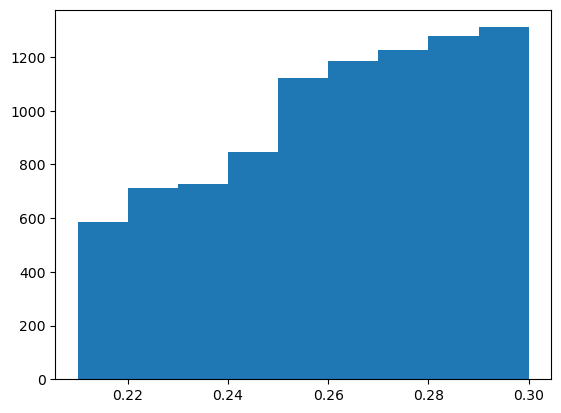

In [21]:
plt.hist([score for score in scores if score>=0.2 and score<=0.3], bins=[0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3])